In [1]:
import sys
from pathlib import Path

# ベースラインモデルとして、時系列順に8:2で分割して学習データと検証データを作成し、勾配ブースティング木モデルのスコアを記録する
# プロジェクトルートのパスを通す
sys.path.append(str(Path.cwd().parent))

In [2]:
from src.utils.env import EnvConfig
import pandas as pd

config = EnvConfig()
train_data_path = config.abs_input_dir / 'train.csv'
test_data_path = config.abs_input_dir / 'test.csv'

df = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# インデックスを日付に変換
df.loc[:, "Date"] = pd.to_datetime(df.loc[:, "Date"])
df.set_index("Date", inplace=True)
df_test.loc[:, "Date"] = pd.to_datetime(df_test.loc[:, "Date"])
df_test.set_index("Date", inplace=True)

print(df.isna().sum())
print(df.shape)


Open     0
High     0
Low      0
Close    0
Up       0
dtype: int64
(2026, 5)


/Users/kokiyamaguchi/Documents/projects/competitions/stock-prediction-practice/.venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/Users/kokiyamaguchi/Documents/projects/competitions/stock-prediction-practice/.venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [3]:
X_data = df.drop(columns=['Up'], inplace=False)
y_data = df.loc[:, "Up"]

print(X_data.head())
print(y_data.head())

             Open   High    Low  Close
Date                                  
2004-01-02  50.85  50.91  50.62  50.72
2004-01-05  50.75  50.84  50.61  50.79
2004-01-06  50.87  51.26  50.86  51.15
2004-01-07  51.45  51.54  51.29  51.51
2004-01-08  51.15  51.33  51.02  51.28
Date
2004-01-02    1
2004-01-05    1
2004-01-06    1
2004-01-07    0
2004-01-08    0
Name: Up, dtype: int64


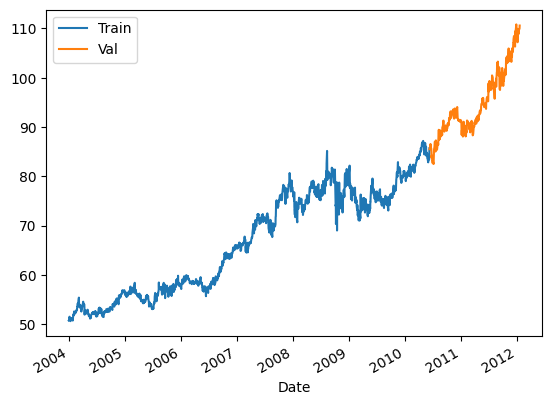

In [4]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)

X_train['Close'].plot(kind='line')

X_val['Close'].plot(kind='line')

plt.legend(['Train', 'Val'])

plt.show()

In [5]:
from src.models.model_xgb import ModelXGB
from src.metrics import regression_metrics

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.1,
    "max_depth": 3,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "early_stopping_rounds": 50,
    "num_round": 1000
}


model = ModelXGB(run_fold_name='xgb_baseline', params=params)
model.train(X_train, y_train, X_val, y_val)
regression_metrics(model, X_val, y_val)



{'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.1, 'max_depth': 3, 'colsample_bytree': 0.8, 'subsample': 0.8, 'early_stopping_rounds': 50, 'num_round': 1000}


,RMSE,R2
0,0.250998,-0.008792
